In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [9]:
train_images.shape

(50000, 32, 32, 3)

In [10]:
batch_size = 16
img_height = 32 #panjang 32
img_width = 32 #lebar

train_img_gen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
val_img_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = train_img_gen.flow(train_images, train_labels, batch_size=batch_size)
val_data_gen = train_img_gen.flow(test_images, test_labels, batch_size=batch_size)

np.random.seed(8)
tf.random.set_seed(8)

In [11]:
#Membangun model 3 block
model = tf.keras.Sequential([layers.Conv2D(32, 3, activation='relu', input_shape=(img_height, img_width ,3)),
                             layers.MaxPooling2D(),
                             layers.Conv2D(64, 3, activation='relu'),
                             layers.MaxPooling2D(),
                             layers.Conv2D(128, 3, activation='relu'),
                             layers.MaxPooling2D(),
                             layers.Flatten(),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(10, activation='softmax')])

In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [14]:
#Training 
history = model.fit(train_data_gen,
                    steps_per_epoch=len(train_images) // batch_size,
                    epochs=20,
                    validation_data=val_data_gen,
                    validation_steps=len(test_images) // batch_size)

Epoch 1/20
3125/3125 [==============================] - 108s 34ms/step - loss: 1.5989 - accuracy: 0.1013 - val_loss: 1.3520 - val_accuracy: 0.1191
Epoch 2/20
3125/3125 [==============================] - 111s 35ms/step - loss: 1.2619 - accuracy: 0.0973 - val_loss: 1.2149 - val_accuracy: 0.1081
Epoch 3/20
3125/3125 [==============================] - 109s 35ms/step - loss: 1.1258 - accuracy: 0.0980 - val_loss: 1.1188 - val_accuracy: 0.0900
Epoch 4/20
3125/3125 [==============================] - 109s 35ms/step - loss: 1.0430 - accuracy: 0.0979 - val_loss: 1.0118 - val_accuracy: 0.0954
Epoch 5/20
3125/3125 [==============================] - 109s 35ms/step - loss: 0.9831 - accuracy: 0.0977 - val_loss: 0.9976 - val_accuracy: 0.1300
Epoch 6/20
3125/3125 [==============================] - 107s 34ms/step - loss: 0.9368 - accuracy: 0.1001 - val_loss: 0.9583 - val_accuracy: 0.0890
Epoch 7/20
3125/3125 [==============================] - 107s 34ms/step - loss: 0.9012 - accuracy: 0.1001 - val_loss: 0

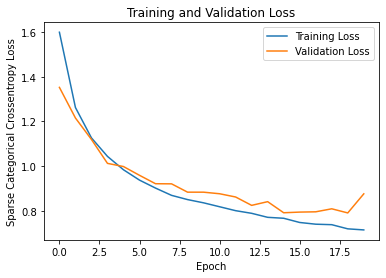

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Sparse Categorical Crossentropy Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

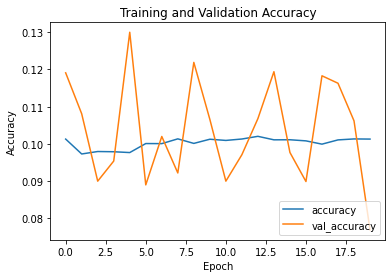

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()